* **Author**: Andrea Ziqing Gallardo Bendito

* **Project**: Bachelor Thesis - *Separación de fuentes musicales en conjuntos de cámara de música clásica*

* **GitHub Repo**: [MusicSourceSep](https://github.com/andrezg98/MusicSourceSep)



---



## **Project repository download and Library installations**

### **Imports**

In [ ]:
# Imports
import numpy as np
import librosa
import torch
import pandas as pd
import os

# Duration
import wave
import contextlib

### **Project repository download**

In [ ]:
from getpass import getpass

# IMPORTANT: ¡Change when publishing the repository!

user = 'andrezg98'
password = getpass('GitHub repo password')
u = user; p = password; 
!git clone https://$u:$p@github.com/$u/MusicSourceSep.git
%cd MusicSourceSep/lib
!ls

del p, password

GitHub repo password··········
Cloning into 'MusicSourceSep'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 68 (delta 19), reused 21 (delta 4), pack-reused 0
Unpacking objects: 100% (68/68), done.
/content/drive/MyDrive/ING. SONIDO E IMAGEN/TFG/Preview Tests/Datasets/URMP-Dataset/MusicSourceSep/lib
feature_computation.py	urmp_dataset.py


### **Datasets**

> * **Bach10_Augmented Dataset**
  
    Accessing the dataset stored in my Google Drive:

In [ ]:
# Access to the Datasets folder
%cd /content/drive/MyDrive/ING. SONIDO E IMAGEN/TFG/Datasets

/content/drive/MyDrive/ING. SONIDO E IMAGEN/TFG/Datasets




---



##  **Modelling Bach 10_Augmented Dataset for Training**
`Bach10_augmented_train.csv` and `Bach10_augmented_validation.csv`

* **Bach10_Augmented**



In [ ]:
AuSep = {'bassoon': list(), 'clarinet': list(), 'saxphone': list(), 'violin': list()}
AuMix = list()
pieces = list()
duration = list()
count = 0

for dirpath, dirnames, filenames in os.walk("Bach10_Scaper/Bach10_Augmented"):
    if count == 0:
        for dirname in dirnames:
            pieces = dirnames
    if count > 0:
        for filename in filenames:
            filename = pieces[count-1] + "/" + filename
            if len(filename.split('-')) == 3:
                AuMix.append(filename)
                AuMix.sort(reverse=False)
                fname = 'Bach10_Scaper/Bach10_Augmented/' + filename
                with contextlib.closing(wave.open(fname,'r')) as f:
                    frames = f.getnframes()
                    rate = f.getframerate()
                    duration.append(frames/float(rate)) # seconds
                    duration.sort(reverse=False)
            else:
                if filename.split('-')[3] == 'bassoon.wav':
                    AuSep['bassoon'].append(filename)
                    AuSep['bassoon'].sort(reverse=False) 
                elif filename.split('-')[3] == 'clarinet.wav':
                    AuSep['clarinet'].append(filename)
                    AuSep['clarinet'].sort(reverse=False)
                elif filename.split('-')[3] == 'saxphone.wav':
                    AuSep['saxphone'].append(filename)
                    AuSep['saxphone'].sort(reverse=False)
                elif filename.split('-')[3] == 'violin.wav':
                    AuSep['violin'].append(filename)
                    AuSep['violin'].sort(reverse=False)
                else:
                    pass
    count += 1
    pieces.sort(reverse=False)

print("Pieces:", pieces)
print("Separate:", AuSep)
print("Mix:", AuMix)
print('Duration:', duration)

Pieces: ['01-AchGottundHerr_102', '01-AchGottundHerr_105', '01-AchGottundHerr_107', '01-AchGottundHerr_110', '01-AchGottundHerr_117', '01-AchGottundHerr_118', '01-AchGottundHerr_153', '01-AchGottundHerr_165', '01-AchGottundHerr_171', '01-AchGottundHerr_176', '01-AchGottundHerr_185', '01-AchGottundHerr_189', '01-AchGottundHerr_201', '01-AchGottundHerr_209', '01-AchGottundHerr_216', '01-AchGottundHerr_226', '01-AchGottundHerr_227', '01-AchGottundHerr_230', '01-AchGottundHerr_249', '01-AchGottundHerr_41', '01-AchGottundHerr_48', '01-AchGottundHerr_50', '01-AchGottundHerr_85', '02-AchLiebenChristen_101', '02-AchLiebenChristen_124', '02-AchLiebenChristen_132', '02-AchLiebenChristen_133', '02-AchLiebenChristen_149', '02-AchLiebenChristen_163', '02-AchLiebenChristen_167', '02-AchLiebenChristen_17', '02-AchLiebenChristen_177', '02-AchLiebenChristen_180', '02-AchLiebenChristen_186', '02-AchLiebenChristen_191', '02-AchLiebenChristen_194', '02-AchLiebenChristen_197', '02-AchLiebenChristen_204', '

* **Bach10**

In [ ]:
AuSep_orig = {'bassoon': list(), 'clarinet': list(), 'saxphone': list(), 'violin': list()}
AuMix_orig = list()
pieces_orig = list()
duration_orig = list()
count = 0

for dirpath, dirnames, filenames in os.walk("Bach10_v1.1"):
    if count == 0:
        pieces_orig = dirnames
    if count > 0:
        for filename in filenames:
            filename = pieces_orig[count-1] + "/" + filename
            if filename.endswith('.wav'):
                if len(filename.split('-')) == 3:
                    AuMix_orig.append(filename)
                    AuMix_orig.sort(reverse=False)
                    fname = 'Bach10_v1.1/' + filename
                    with contextlib.closing(wave.open(fname,'r')) as f:
                        frames = f.getnframes()
                        rate = f.getframerate()
                        duration_orig.append(frames/float(rate)) # seconds
                        duration_orig.sort(reverse=False)
                else:
                    if filename.split('-')[3] == 'bassoon.wav':
                        AuSep_orig['bassoon'].append(filename)
                        AuSep_orig['bassoon'].sort(reverse=False) 
                    elif filename.split('-')[3] == 'clarinet.wav':
                        AuSep_orig['clarinet'].append(filename)
                        AuSep_orig['clarinet'].sort(reverse=False)
                    elif filename.split('-')[3] == 'saxphone.wav':
                        AuSep_orig['saxphone'].append(filename)
                        AuSep_orig['saxphone'].sort(reverse=False)
                    elif filename.split('-')[3] == 'violin.wav':
                        AuSep_orig['violin'].append(filename)
                        AuSep_orig['violin'].sort(reverse=False)
                    else:
                        pass
            else:
                pass
    count += 1
    pieces_orig.sort(reverse=False)

print("Pieces:", pieces_orig)
print("Separate:", AuSep_orig)
print("Mix:", AuMix_orig)
print('Duration:', duration_orig)

Pieces: ['.ipynb_checkpoints', '01-AchGottundHerr', '02-AchLiebenChristen', '03-ChristederdubistTagundLicht', '04-ChristeDuBeistand', '05-DieNacht', '06-DieSonne', '07-HerrGott', '08-FuerDeinenThron', '09-Jesus', '10-NunBitten', 'Code']
Separate: {'bassoon': ['01-AchGottundHerr/01-AchGottundHerr-bassoon.wav', '02-AchLiebenChristen/02-AchLiebenChristen-bassoon.wav', '03-ChristederdubistTagundLicht/03-ChristederdubistTagundLicht-bassoon.wav', '04-ChristeDuBeistand/04-ChristeDuBeistand-bassoon.wav', '05-DieNacht/05-DieNacht-bassoon.wav', '06-DieSonne/06-DieSonne-bassoon.wav', '07-HerrGott/07-HerrGott-bassoon.wav', '08-FuerDeinenThron/08-FuerDeinenThron-bassoon.wav', '09-Jesus/09-Jesus-bassoon.wav', '10-NunBitten/10-NunBitten-bassoon.wav'], 'clarinet': ['01-AchGottundHerr/01-AchGottundHerr-clarinet.wav', '02-AchLiebenChristen/02-AchLiebenChristen-clarinet.wav', '03-ChristederdubistTagundLicht/03-ChristederdubistTagundLicht-clarinet.wav', '04-ChristeDuBeistand/04-ChristeDuBeistand-clarinet.

Now we join the new pieces generated with the original ones to obtain the whole dataset to train with.

In [ ]:
AuMix = AuMix + AuMix_orig

AuSep['bassoon'] = AuSep['bassoon'] + AuSep_orig['bassoon']
AuSep['clarinet'] = AuSep['clarinet'] + AuSep_orig['clarinet']
AuSep['saxphone'] = AuSep['saxphone'] + AuSep_orig['saxphone']
AuSep['violin'] = AuSep['violin'] + AuSep_orig['violin']

AuSep = {'bassoon': AuSep['bassoon'], 'clarinet': AuSep['clarinet'], 'saxphone': AuSep['saxphone'], 'violin': AuSep['violin']}
duration = duration + duration_orig

print("*** BACH10 AUGMENTED DATASET ***")
print("Separate: \n\t", AuSep)
print("Mix: \n\t", AuMix)
print('Duration: \n\t', duration)

*** BACH10 AUGMENTED DATASET ***
Separate: 
	 {'bassoon': ['01-AchGottundHerr_102/01-AchGottundHerr_102-bassoon.wav', '01-AchGottundHerr_105/01-AchGottundHerr_105-bassoon.wav', '01-AchGottundHerr_107/01-AchGottundHerr_107-bassoon.wav', '01-AchGottundHerr_110/01-AchGottundHerr_110-bassoon.wav', '01-AchGottundHerr_117/01-AchGottundHerr_117-bassoon.wav', '01-AchGottundHerr_118/01-AchGottundHerr_118-bassoon.wav', '01-AchGottundHerr_153/01-AchGottundHerr_153-bassoon.wav', '01-AchGottundHerr_165/01-AchGottundHerr_165-bassoon.wav', '01-AchGottundHerr_171/01-AchGottundHerr_171-bassoon.wav', '01-AchGottundHerr_176/01-AchGottundHerr_176-bassoon.wav', '01-AchGottundHerr_185/01-AchGottundHerr_185-bassoon.wav', '01-AchGottundHerr_189/01-AchGottundHerr_189-bassoon.wav', '01-AchGottundHerr_201/01-AchGottundHerr_201-bassoon.wav', '01-AchGottundHerr_209/01-AchGottundHerr_209-bassoon.wav', '01-AchGottundHerr_216/01-AchGottundHerr_216-bassoon.wav', '01-AchGottundHerr_226/01-AchGottundHerr_226-bassoon.wav

After getting the required separated and mixed audio files, we can model the `.csv` file:

In [ ]:
# DataFrame
df = pd.DataFrame(np.array([AuMix, AuSep['bassoon'], AuSep['clarinet'], AuSep['saxphone'], AuSep['violin'], duration]).T, columns=['mix_path', 'bassoon_path', 'clarinet_path', 'saxphone_path', 'violin_path', 'duration'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

bach10_augmented_train, bach10_augmented_validation = train_test_split(df, test_size=0.1)

bach10_augmented_train.to_csv(r'../MusicSourceSep/lib/bach10_augmented_train.csv', index=False)
bach10_augmented_validation.to_csv(r'../MusicSourceSep/lib/bach10_augmented_validation.csv', index=False)

In [ ]:
bach10_augmented_train

,mix_path
,bassoon_path
,clarinet_path
,saxphone_path
,violin_path
,duration
3,[01-AchGottundHerr_102/01-AchGottundHerr_102-s...
4,[01-AchGottundHerr_102/01-AchGottundHerr_102-v...
2,[01-AchGottundHerr_102/01-AchGottundHerr_102-c...
0,[01-AchGottundHerr_102/01-AchGottundHerr_102.w...
1,[01-AchGottundHerr_102/01-AchGottundHerr_102-b...


In [ ]:
bach10_augmented_validation

,mix_path
,bassoon_path
,clarinet_path
,saxphone_path
,violin_path
,duration
5,"[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25...."




---



# **Training**

In [ ]:
!pip install spleeter

In [ ]:
%cd "../MusicSourceSep"

/content/drive/My Drive/ING. SONIDO E IMAGEN/TFG/MusicSourceSep


**Note**: change the name of the model if we modify any parameter of `config.json`

**Bach10 Model**

In [ ]:
!spleeter train -p "lib/bach10_config.json" -d "../Datasets/Bach10_v1.1"

INFO:spleeter:Start model training
INFO:spleeter:Model training done


We move the new model (with the name defined in `config.json`) to the *pretrained_models* folder of *MusicSourceSep*

In [ ]:
!mv bach10_model_3/ "pretrained_models/"

# **Separation**

We study the separation performed by the model.

To check that it performs the training well, we try to use in the separation evaluation the same pieces with which it has been trained (even if it is cheating).

In [ ]:
!spleeter separate -o "outs/01-AchGottundHerr_model_3" -p "lib/bach10_config.json" "../Datasets/Bach10_v1.1/01-AchGottundHerr/01-AchGottundHerr.wav"

INFO:spleeter:File outs/01-AchGottundHerr_model_3/01-AchGottundHerr/bassoon.wav written succesfully
INFO:spleeter:File outs/01-AchGottundHerr_model_3/01-AchGottundHerr/clarinet.wav written succesfully
INFO:spleeter:File outs/01-AchGottundHerr_model_3/01-AchGottundHerr/violin.wav written succesfully
INFO:spleeter:File outs/01-AchGottundHerr_model_3/01-AchGottundHerr/saxphone.wav written succesfully


Pretrained model 4-stems:

In [ ]:
!spleeter separate -o "outs/01-AchGottundHerr_model_4stems" -p spleeter:4stems "../Datasets/Bach10_v1.1/01-AchGottundHerr/01-AchGottundHerr.wav"

INFO:spleeter:File outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/vocals.wav written succesfully
INFO:spleeter:File outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/drums.wav written succesfully
INFO:spleeter:File outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/bass.wav written succesfully
INFO:spleeter:File outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/other.wav written succesfully


**Check the separate audio outputs**

In [ ]:
from IPython.display import Audio

In [ ]:
Audio('outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/vocals.wav')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Audio('outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/drums.wav')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Audio('outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/bass.wav')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Audio('outs/01-AchGottundHerr_model_4stems/01-AchGottundHerr/other.wav')

Output hidden; open in https://colab.research.google.com to view.

**Note**: If the audio files are very heavy, execute the following two cells to download the files locally.

In [ ]:
!zip -r "01-AchGottundHerr_model_1.zip" "outs/01-AchGottundHerr_model_1/01-AchGottundHerr/download"

  adding: bach10_output_playful2/playful/ (stored 0%)
  adding: bach10_output_playful2/playful/bassoon.wav (deflated 36%)
  adding: bach10_output_playful2/playful/clarinet.wav (deflated 36%)
  adding: bach10_output_playful2/playful/saxphone.wav (deflated 36%)
  adding: bach10_output_playful2/playful/violin.wav (deflated 36%)


In [ ]:
from google.colab import files
files.download("01-AchGottundHerr_model_1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Evaluation**

### **MUS eval**

In [ ]:
# Try to use Spleeter eval
!python -m spleeter evaluate -p "lib/bach10_config.json" --mus_dir "../Preview Tests/Datasets/Bach10_v1.1" -o bach10_output_eval --mwf

### **MIR eval separation**

In [ ]:
!pip install mir_eval

**Bach 10 Dataset**

In [ ]:
%cd "../Datasets/Bach10_v1.1/"

/content/drive/My Drive/ING. SONIDO E IMAGEN/TFG/Datasets/Bach10_v1.1


In [ ]:
# Get reference sources

from pathlib import Path

path_bassoon_ref = Path(AuSep['bassoon'][0])
path_clarinet_ref = Path(AuSep['clarinet'][0])
path_saxphone_ref = Path(AuSep['saxphone'][0])
path_violin_ref = Path(AuSep['violin'][0])

bassoon_reference, sr = librosa.load(path_bassoon_ref, duration=25.0) # 25 segundos
clarinet_reference, sr = librosa.load(path_clarinet_ref, duration=25.0)
saxphone_reference, sr = librosa.load(path_saxphone_ref, duration=25.0)
violin_reference, sr = librosa.load(path_violin_ref, duration=25.0)

reference_sources = np.array([bassoon_reference, clarinet_reference, saxphone_reference, violin_reference])

In [ ]:
bassoon_reference.shape

(551250,)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

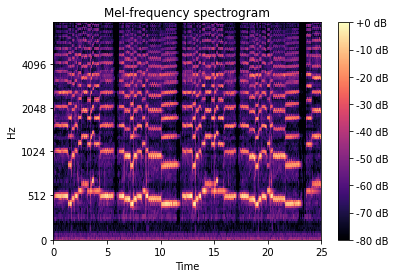

In [ ]:
# Mel Spectrogram from Violin Reference Source
S = librosa.feature.melspectrogram(y=violin_reference, sr=sr, n_mels=128, fmax=8000)

import matplotlib.pyplot as plt
import librosa.display

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
%cd ../../MusicSourceSep/outs/

/content/drive/My Drive/ING. SONIDO E IMAGEN/TFG/MusicSourceSep/outs


In [ ]:
# Get estimated sources

from pathlib import Path

path_bassoon_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/bassoon.wav")
path_clarinet_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/clarinet.wav")
path_saxphone_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/saxphone.wav")
path_violin_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/violin.wav")

bassoon_estimated, sr = librosa.load(path_bassoon_est, duration=25.0) # 25 segundos
clarinet_estimated, sr = librosa.load(path_clarinet_est, duration=25.0)
saxphone_estimated, sr = librosa.load(path_saxphone_est, duration=25.0)
violin_estimated, sr = librosa.load(path_violin_est, duration=25.0)

estimated_sources = np.array([bassoon_estimated, clarinet_estimated, saxphone_estimated, violin_estimated])

In [ ]:
bassoon_estimated.shape

(551250,)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

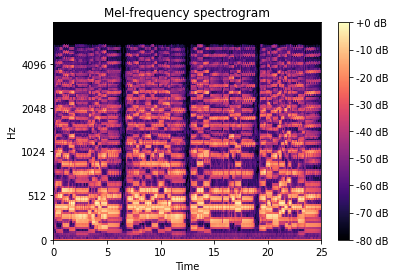

In [ ]:
# Mel Spectrogram from Violin Estimated Source
S = librosa.feature.melspectrogram(y=violin_estimated, sr=sr, n_mels=128, fmax=8000)

import matplotlib.pyplot as plt
import librosa.display

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

Once the reference and estimated sources were obtained, we performed the evaluation.

In [ ]:
import mir_eval
(SDR, SIR, SAR, PERM) = mir_eval.separation.bss_eval_sources(reference_sources, estimated_sources, compute_permutation=True)

print("-----------------------------------")
print("Source-to-Distortion Ratio (SDR):")
print("-----------------------------------")
print("Bassoon: %f " %SDR[0])
print("Clarinet: %f " %SDR[1])
print("Saxphone: %f " %SDR[2])
print("Violin: %f " %SDR[3])

print("-----------------------------------")
print("Source-to-Interference Ratio (SIR):")
print("-----------------------------------")
print("Bassoon: %f " %SIR[0])
print("Clarinet: %f " %SIR[1])
print("Saxphone: %f " %SIR[2])
print("Violin: %f " %SIR[3])

print("-----------------------------------")
print("Source-to-Artifact Ratio (SAR):")
print("-----------------------------------")
print("Bassoon: %f " %SAR[0])
print("Clarinet: %f " %SAR[1])
print("Saxphone: %f " %SAR[2])
print("Violin: %f " %SAR[3])

print("-----------------------------------")
print("PERM:")
print("-----------------------------------")
print("Bassoon: %f " %PERM[0])
print("Clarinet: %f " %PERM[1])
print("Saxphone: %f " %PERM[2])
print("Violin: %f " %PERM[3])


Source-to-Distortion Ratio (SDR):
Bassoon: -17.001879 
Clarinet: -16.720611 
Saxphone: -17.103840 
Violin: -27.594892 
Source-to-Interference Ratio (SIR):
Bassoon: 2.682824 
Clarinet: 3.521045 
Saxphone: 2.403258 
Violin: -12.129491 
Source-to-Artifact Ratio (SAR):
Bassoon: -15.082089 
Clarinet: -15.082089 
Saxphone: -15.082088 
Violin: -15.082090 
PERM:
Bassoon: 3.000000 
Clarinet: 0.000000 
Saxphone: 1.000000 
Violin: 2.000000 


In [ ]:
(SDR, ISR, SIR, SAR, PERM) = mir_eval.separation.bss_eval_images_framewise(reference_sources, estimated_sources, window=1323000, hop=661500, compute_permutation=False)

In [ ]:
score = mir_eval.separation.evaluate(reference_sources, estimated_sources)